<font color='blue'> Привет. Ниже мои комментарии выделены синим. </font>

# Приоритизация гипотезы, запуск A/B-теста и анализ результатов.

## 1.Приоритизация гипотез.

### Импортируем библиотеки:

In [78]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Импортируем данные:

In [79]:
data = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [80]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Применяем фреймворк ICE для приоритизации гипотез. Сортируем их по убыванию приоритета.

In [81]:
#ICE score = (impact * confidence)/efforts
data['ICE']= (data['Impact'] * data['Confidence']) / data['Efforts']
data[['Hypothesis','ICE']].sort_values(by= 'ICE',ascending= False )

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Наиболее перспективные гиппотезы 8, 0, 7, 6.

### Считаем фреймворк RICE:

In [82]:
data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence'])\
/ data['Efforts']

print(data[['Hypothesis','RICE']].sort_values(by= 'RICE',ascending= False ))

                                          Hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


Здесь самые перспективные 7, 2, 0, 6. Гипотеза 8 опустилась на 5 место из за очент низкого охвата пользователей при других высоких показателях. А у гиппотезы 7 reach максимальный.


<font color='blue'> Параметры рассчитаны верно. </font>

### 2. Анализ A/B-теста

In [83]:
orders.head(10)#выводим таблицу заказов
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

In [84]:
visitors.head(10)#выводим таблицу пользователей

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Строим график кумулятивной выручки по группам:


In [85]:
#переводим дату в формат datetime
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
#создаем переменную datesGroups и удаляем дубликаты
datesGroups = orders[['date','group']].drop_duplicates()
# создаем таблицы ordersAggregated и visitorsAggregated
ordersAggregated = datesGroups.apply(
	lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].\
    agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].\
agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#объединяем таблицы и присваиваем столбцам названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'],\
right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
#Объявляем переменные cummulativeRevenueA и cummulativeRevenueB, в которых сохраните данные о датах,\
#выручке и числе заказов в группах A и B.
# данные по группе A
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
# данные по группе В
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

                 



        date  revenue  orders
0 2019-08-01   148579      24
2 2019-08-02   242401      44
4 2019-08-03   354874      68
6 2019-08-04   425699      84
8 2019-08-05   549917     109


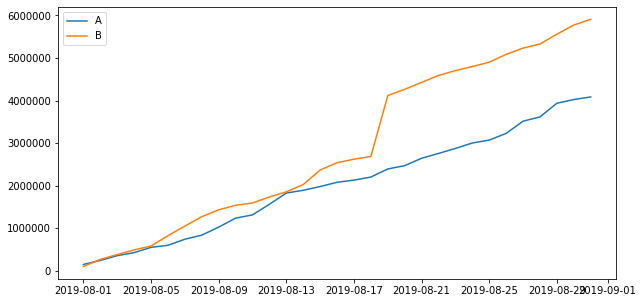

In [86]:
print(cummulativeRevenueA.head())
#задаем размер графика
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')

plt.legend()

Выручка А практически равномерно увеличивается на протяжении всего теста. В графике В видим в одном месте резкий скачок.Это может говорить о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем ниже.

<font color='blue'> Хорошо, а чем можно объяснить этот скачок? </font>

### Строим график кумулятивного среднего чека по группам. 

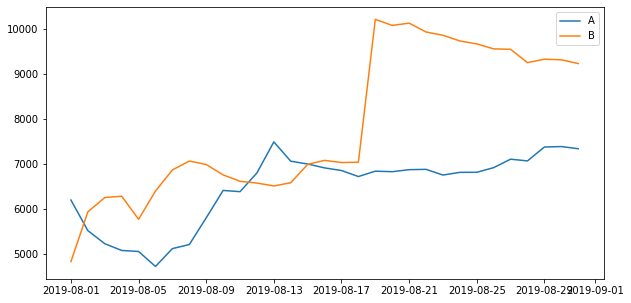

In [87]:
#разделим кумулятивную выручку на число заказов
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'],\
label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'],\
label='B')
plt.legend()

В среднем чеке В наблюдаем резкий скачок в том же месте, что и выручка.Думаю, в группу B в этом месте попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на уровне. Средний чек А сперва резко падает, потом растет, где-то с середины теста более менее равномерен

<font color='blue'> Отлично, опять же надо предположить причины скачка. </font>

### Строим график относительного изменения кумулятивного среднего чека группы B к группе A.

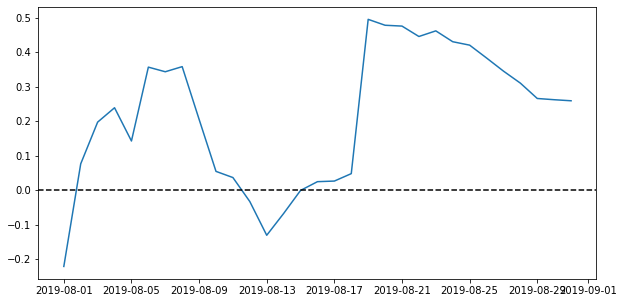

In [88]:
#соединяем таблицы кумулятивных данных
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date',\
right_on='date', how='left', suffixes=['A', 'B'])
# строим график кумулятивной выручки В к А
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/
(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
#добавляем среднюю 0 линию
plt.axhline(y=0, color='black', linestyle='--')

График различия в нескольких точках резко скачет. Скачок точно повторяет аномальный рост выручки и среднего чека группы В. Где-то  точно спрятались крупные заказы и выбросы. Найдём их позже.

<font color='blue'> График верный. Только опять нет причин и предположений по поводу поведения, отображенного на графике. Здесь важно отметить демонстрируют ли графики какую то общую картину. </font>

### График кумулятивной конверсии по группам:
    

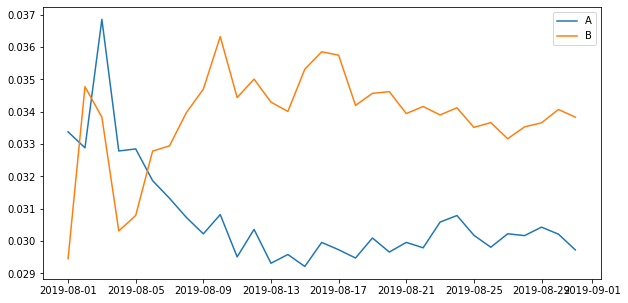

In [89]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
# данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

# данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
# строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()





 В начале конверсия группы В проигрывала. Конверсии обеих групп после резкого взлета одновременно упали,  около одного значения, но затем конверсия группы В вырвалась вперёд, а конверсия группы А просела.Поведение графиков опять подтверждает подозрение на наличие выбросов в группе В. 

### Cтроим график относительного изменения кумулятивной конверсии группы B к группе A.

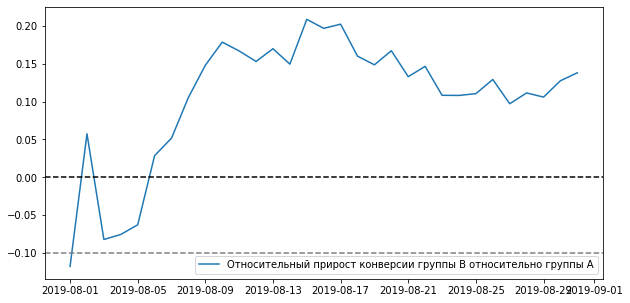

In [90]:
#создаем общую таблицу с данными  о дате и кумулятивной конверсии
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].\
merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date',\
how='left', suffixes=['A', 'B'])
#строим график
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/\
mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B \
относительно группы A")
plt.legend()
#
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
#plt.axis(["2019-04-01", '2019-04-23', -0.6, 0.6])

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия упала. Затем сильно выросла и продолжает держаться на высоком уровне постепенно понижаясь. Группа В уже подозревалась в наличии выбро

<font color='blue'> Опять же графики верны, но нет полного пояснения к ним. Ты описываешь картинку, но не объясняешь причины. </font>

### Строим точечный график количества заказов по пользователям:

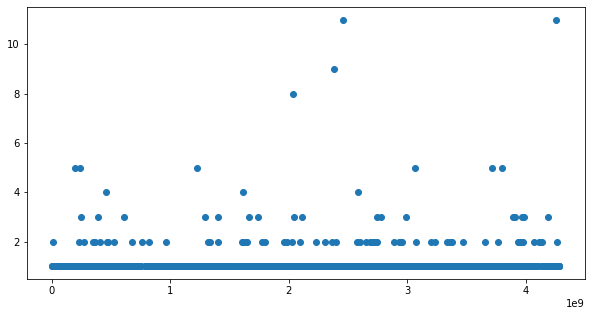

In [91]:
#группируем таблицу по пользователям
ordersByUsers = orders.groupby('visitorId').agg({'transactionId': pd.Series.nunique}).reset_index()

plt.scatter(ordersByUsers['visitorId'], ordersByUsers['transactionId'])
#ordersByUsers

Большинство пользователей делают по одному заказу. Гораздо меньше два. Больше трех уже аномалия.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [92]:
np.percentile(ordersByUsers['transactionId'], [90, 95, 99])

array([1., 2., 4.])

Не более 5 процентов пользователей делали 2 заказа.Разумно выбрать 3 заказа на пользователя в качестве нижней границы.Пользователи, совершившие много заказов, влияют на числитель формулы конверсии. Скорее всего, их поведение отличается от нормального. Если речь не идёт об интернет-магазине с регулярным спросом, «обычный» пользователь совершает не больше двух заказов за короткий срок.

<font color='blue'> Хорошо. </font>

### Построим точечный график стоимостей заказов.

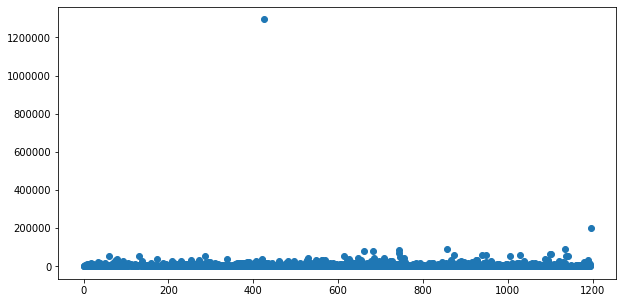

In [93]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

Есть немного дорогих заказов.Принято отсеивать от 1% до 5% наблюдений с крайними значениями.Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [94]:
np.percentile(orders['revenue'], [90, 95, 99])
#orders['revenue'].sort_values()

array([18168. , 28000. , 58233.2])

На графике видны единичные очень дорогие заказы, которые явно  изкажают картину изменения среднего чека и выручки. Так как нам неизвестно продажу чего мы анализируем, ни одержание гипотез, причину таких выбросов определить затруднительно. Можем только сравнивать выборки количественно.  Думаю логично принять за аномалию заказ более 28000 руб

<font color='blue'> Хорошо. Но на графике видны явные аномалии их роль нужно объяснить. Плюс, за уровень округления лучше принять именно квантиль, не округляй, возьми то число, какое есть, чтоб было понятно откуда это взято. </font>

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [95]:
#таблица для гуппы А
visitorsADaily=visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
# агрегируем таблицу с кумулятивными данными по визитам
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] \
<= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
# для группы В
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= \
x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#создаем таблицы для А и В с агрегироваными данными по заказам и выручке
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
.groupby('date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
#объединяем таблицы
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

print(data.head(5))
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
#В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userid', 'orders']


ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False)\
.agg({'transactionId' :pd.Series.nunique})
ordersByUsersB.columns = ['userid', 'orders']

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() -\
len(ordersByUsersA['orders'])), name='orders')]

#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать \
#количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 
#Подготовим выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
.sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
.sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
                    
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId',as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
                    
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId',as_index=False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']  
                    
#sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
#.sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0) 
                    
#sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']\
#.sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
                    
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))                    
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/\
(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))                    


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

p-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13. 8%

<font color='blue'> Правильно. </font>

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [96]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


Статистически значимых отличий в среднем чеке между группами нет. Относительное различие чека между сегментама аж 25.9 %

<font color='blue'> Верно. </font>

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.
Примем за аномальных пользователей тех, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 30 000 рублей.

In [97]:
# создаем переменные usersWithManyOrders и usersWithExpensiveOrders пользователей с аномалными
#количеством и суммой покупок
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],\
ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['transactionId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
ordersByUsersB.head()

858     192721366
18      199603092
23      237748145
37      249864742
1099    316924019
dtype: int64


,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [98]:
#создаем переменные sampleAFiltered и sampleAFiltered с "чистыми" данными и проводим тест манна уитни
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].\
isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']\
.sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)



sampleBFiltered = \
pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']\
.isin(abnormalUsers))]['orders'],pd.Series(0, index=\
np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00577
0.170


 Статистическая значимость после очистки данных немного не достигнута, относительный прирост конверсии после удаления аномалий вырос с 13.8% до 17%.
 
 <font color='blue'> Здесь какая-то ошибка, разница не должна быть 0. </font>
 
 <font color='red'> Вот теперь хорошо. </font>

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:

In [99]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['transactionId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['transactionId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['transactionId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['transactionId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.434
-0.019


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия нет.
Статистческая значимость после очищения данных также не достигнута.Относительное различие чека между сегментами упало с 25.9 % до -1.9%, средний чек группы В без выбросов стал даже чуть меньше среднего чека группы А.

<font color='blue'> Это верно. Тут нужно отметить что разхница из положительной стала отрицательной. Надо объяснить причины. </font>

# Выводы

Статистическая значимость по конверсии исчезла после фильтрации данных.
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
График различия конверсии между группами по сырым данным сообщает, что результаты группы B лучше группы A
Исходя их обнаруженных фактов, тест следует остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — практически нулевая.

<font color='blue'> В проекте почти все рассчитано верно, но комментарии не полные, объяснения нигде нет. Надо поправить один рассчет по отфильтрованным данным. Плюс надо дополнить все комментарии. Не описывай графики, опиши ситуацию, которая сформировала данные графики. </font>

<font color='red'> Отличный проект получился, молодец. </font>